### Алексей Макаров, CoMagic

### t.me/datalytx Канал Datalytics

https://tgp.bolt.rstat.org/datalytx

https://www.facebook.com/groups/pydata

https://web.facebook.com/ax.makarov

https://digitalgod.be/

Датасет: https://yadi.sk/d/5RABMwIbwD7bHQ

# Анализ поведенческих данных с помощью Python. Полезные примеры

In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
from matplotlib import pyplot as plt

import statsmodels.stats.proportion as prop
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('user_events.csv', dtype={'client_id': object})

In [3]:
df.head()

sessionId              client_id deviceCategory  \
0  1571898231  1496161455.1571898237        desktop   
1  1571898231  1496161455.1571898237        desktop   
2  1571898231  1496161455.1571898237        desktop   
3  1571898231  1496161455.1571898237        desktop   
4  1571898231  1496161455.1571898237        desktop   

                 activityTime activityType  source medium channelGrouping  \
0  2019-10-24 09:23:51.177840     PAGEVIEW  yandex    cpc     Paid Search   
1  2019-10-24 09:24:47.687768        EVENT  yandex    cpc     Paid Search   
2  2019-10-24 09:25:06.421688     PAGEVIEW  yandex    cpc     Paid Search   
3  2019-10-24 09:25:12.741687     PAGEVIEW  yandex    cpc     Paid Search   
4  2019-10-24 09:25:30.826373     PAGEVIEW  yandex    cpc     Paid Search   

     campaign     keyword eventName                          pagePath  
0  6194754e-2  ec1ad238-c       NaN  59e8b1365affd314d19d0927e55ae582  
1  6194754e-2  ec1ad238-c      open  59e8b1365affd314d19d0927e55ae582  
2  6194754e-2  ec1ad238-c       NaN  a73f257eb1c565b4701c539e96968fe7  
3  6194754e-2  ec1ad238-c       NaN  a73f257eb1c565b4701c539e96968fe7  
4  6194754e-2  ec1ad238-c       NaN  073cdaa361d0b031787910ad359ecee7

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260881 entries, 0 to 260880
Data columns (total 12 columns):
sessionId          260881 non-null int64
client_id          260881 non-null object
deviceCategory     260881 non-null object
activityTime       260881 non-null object
activityType       260881 non-null object
source             260881 non-null object
medium             260881 non-null object
channelGrouping    260881 non-null object
campaign           260881 non-null object
keyword            260881 non-null object
eventName          86589 non-null object
pagePath           260869 non-null object
dtypes: int64(1), object(11)
memory usage: 23.9+ MB


In [5]:
df['activityTime'] = pd.to_datetime(df['activityTime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260881 entries, 0 to 260880
Data columns (total 12 columns):
sessionId          260881 non-null int64
client_id          260881 non-null object
deviceCategory     260881 non-null object
activityTime       260881 non-null datetime64[ns]
activityType       260881 non-null object
source             260881 non-null object
medium             260881 non-null object
channelGrouping    260881 non-null object
campaign           260881 non-null object
keyword            260881 non-null object
eventName          86589 non-null object
pagePath           260869 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 23.9+ MB


In [7]:
df[df.duplicated()]

Empty DataFrame
Columns: [sessionId, client_id, deviceCategory, activityTime, activityType, source, medium, channelGrouping, campaign, keyword, eventName, pagePath]
Index: []

In [8]:
df['sessionId'].nunique()

25029

In [9]:
df['sessionId'].nunique()

25029

In [10]:
df['client_id'].nunique()

4419

In [11]:
df['sessionId'].nunique()/df['client_id'].nunique()

5.663951120162933

In [12]:
# 0.25.0
df.groupby(['activityType']).agg(cnt=('activityTime','count'),
                                users=('client_id','nunique'))

cnt  users
activityType               
EVENT          86589   4419
PAGEVIEW      174292   4419

In [13]:
by_activity_types = df.groupby(['activityType']).agg(cnt=('activityTime','count'),
                                users=('client_id','nunique'))
by_activity_types['hits_per_user'] = by_activity_types['cnt'] / by_activity_types['users']
by_activity_types

cnt  users  hits_per_user
activityType                              
EVENT          86589   4419         19.595
PAGEVIEW      174292   4419         39.442

In [14]:
by_activity_types_and_source = df.groupby(['activityType','source']).agg(cnt=('activityTime','count'),
                                users=('client_id','nunique'))
by_activity_types_and_source['hits_per_user'] = by_activity_types_and_source['cnt'] / by_activity_types_and_source['users']
by_activity_types_and_source

cnt  users  hits_per_user
activityType source                             
EVENT        google  23832   1308         18.220
             other   22149   1536         14.420
             yandex  40608   2135         19.020
PAGEVIEW     google  51251   1365         37.547
             other   39146   1651         23.710
             yandex  83895   2158         38.876

In [15]:
activity_type_condition = df['activityType'] == 'EVENT'
target_event_condition = df['eventName'] == 'target_event'

In [16]:
df[activity_type_condition & target_event_condition]

sessionId              client_id deviceCategory  \
796     1571995017  1236401517.1571994967        desktop   
800     1571995017  1236401517.1571994967        desktop   
1993    1570437357  1920888490.1570437357        desktop   
1996    1570437357  1920888490.1570437357        desktop   
2018    1570437357  1920888490.1570437357        desktop   
...            ...                    ...            ...   
260233  1571652425   339081253.1570445710         mobile   
260301  1570541701  1571786447.1570541700        desktop   
260302  1570541701  1571786447.1570541700        desktop   
260303  1570541701  1571786447.1570541700        desktop   
260304  1570541701  1571786447.1570541700        desktop   

                     activityTime activityType  source    medium  \
796    2019-10-25 12:36:47.992985        EVENT   other    (none)   
800    2019-10-25 12:44:15.215574        EVENT   other    (none)   
1993   2019-10-07 11:38:41.294822        EVENT  yandex  referral   
1996   2019-10-07 11:39:56.129728        EVENT  yandex  referral   
2018   2019-10-07 11:46:04.125301        EVENT  yandex  referral   
...                           ...          ...     ...       ...   
260233 2019-10-21 13:07:09.740400        EVENT  yandex       cpc   
260301 2019-10-08 16:39:14.298530        EVENT  yandex       cpc   
260302 2019-10-08 16:39:52.871978        EVENT  yandex       cpc   
260303 2019-10-08 16:40:43.391442        EVENT  yandex       cpc   
260304 2019-10-08 16:41:37.511067        EVENT  yandex       cpc   

       channelGrouping    campaign     keyword     eventName  \
796             Direct   (not set)   (not set)  target_event   
800             Direct   (not set)   (not set)  target_event   
1993          Referral   (not set)   (not set)  target_event   
1996          Referral   (not set)   (not set)  target_event   
2018          Referral   (not set)   (not set)  target_event   
...                ...         ...         ...           ...   
260233     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260301     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260302     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260303     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260304     Paid Search  b0ea4211-c  ab303cd7-f  target_event   

                                pagePath  
796     ac2d8ba71356f9486ea256e2025aa721  
800     ac2d8ba71356f9486ea256e2025aa721  
1993    68970f778dbc5f652fe77962522a7bab  
1996    0208410e17d14798b0cca44b6c584fb8  
2018    0208410e17d14798b0cca44b6c584fb8  
...                                  ...  
260233  aff13c7de52d3248c3571e7325929139  
260301  a73f257eb1c565b4701c539e96968fe7  
260302  a73f257eb1c565b4701c539e96968fe7  
260303  a73f257eb1c565b4701c539e96968fe7  
260304  a73f257eb1c565b4701c539e96968fe7  

[4891 rows x 12 columns]

In [17]:
df[activity_type_condition & target_event_condition].\
    groupby(['medium']).\
    agg(sessions_with_target_event = ('sessionId','nunique'))

sessions_with_target_event
medium                                     
(none)                                  170
(not set)                                12
banner                                    6
cpc                                     875
din_remarketing                           4
marketing                                 1
organic                                 336
partner                                  28
redirect                                  5
referral                                414
sh                                       10
special                                   2
subscribe                                 7

In [18]:
by_medium_target = df[activity_type_condition & target_event_condition].\
    groupby(['medium']).\
    agg(sessions_with_target_event = ('sessionId','nunique'))
by_medium_target

sessions_with_target_event
medium                                     
(none)                                  170
(not set)                                12
banner                                    6
cpc                                     875
din_remarketing                           4
marketing                                 1
organic                                 336
partner                                  28
redirect                                  5
referral                                414
sh                                       10
special                                   2
subscribe                                 7

In [19]:
by_medium_all = df.groupby(['medium']).agg(sessions = ('sessionId','nunique'))

In [20]:
by_medium_all

sessions
medium                   
(none)               1693
(not set)             295
banner                 70
cpc                 10110
din_remarketing       179
logo                    1
marketing              52
organic              5049
partner               556
redirect               76
referral             6776
sh                    118
special                56
subscribe             115

In [21]:
joined_by_medium = by_medium_all.join(by_medium_target)

In [22]:
joined_by_medium

sessions  sessions_with_target_event
medium                                               
(none)               1693                     170.000
(not set)             295                      12.000
banner                 70                       6.000
cpc                 10110                     875.000
din_remarketing       179                       4.000
logo                    1                         nan
marketing              52                       1.000
organic              5049                     336.000
partner               556                      28.000
redirect               76                       5.000
referral             6776                     414.000
sh                    118                      10.000
special                56                       2.000
subscribe             115                       7.000

In [23]:
joined_by_medium['confidence_intervals'] = joined_by_medium.apply(lambda x: prop.proportion_confint(x['sessions_with_target_event'],x['sessions'],alpha=0.05), axis=1)

In [24]:
joined_by_medium

sessions  sessions_with_target_event  \
medium                                                  
(none)               1693                     170.000   
(not set)             295                      12.000   
banner                 70                       6.000   
cpc                 10110                     875.000   
din_remarketing       179                       4.000   
logo                    1                         nan   
marketing              52                       1.000   
organic              5049                     336.000   
partner               556                      28.000   
redirect               76                       5.000   
referral             6776                     414.000   
sh                    118                      10.000   
special                56                       2.000   
subscribe             115                       7.000   

                                          confidence_intervals  
medium                                                          
(none)              (0.08609696034112085, 0.11472997409479171)  
(not set)           (0.01813563066957144, 0.06322030153381838)  
banner             (0.020135005868943873, 0.15129356555962756)  
cpc                 (0.08106717382508714, 0.09202877078421058)  
din_remarketing  (0.0006933942092354831, 0.043999343220932116)  
logo                                                (nan, nan)  
marketing                           (0.0, 0.05655820558341993)  
organic             (0.05967305776457033, 0.07342260474285689)  
partner             (0.032182307355662756, 0.0685371171047689)  
redirect            (0.010052693185161742, 0.1215262541832593)  
referral            (0.05539523418665997, 0.06680075164568951)  
sh                  (0.03449565953632183, 0.13499586588740697)  
special                              (0.0, 0.0843189478138611)  
subscribe           (0.017171498014092422, 0.1045676324206902)

In [25]:
joined_by_medium[['b1', 'b2']] = pd.DataFrame(joined_by_medium.apply(lambda x: prop.proportion_confint(x['sessions_with_target_event'],x['sessions'],alpha=0.05), axis=1).tolist(), index=joined_by_medium.index)

In [26]:
joined_by_medium

sessions  sessions_with_target_event  \
medium                                                  
(none)               1693                     170.000   
(not set)             295                      12.000   
banner                 70                       6.000   
cpc                 10110                     875.000   
din_remarketing       179                       4.000   
logo                    1                         nan   
marketing              52                       1.000   
organic              5049                     336.000   
partner               556                      28.000   
redirect               76                       5.000   
referral             6776                     414.000   
sh                    118                      10.000   
special                56                       2.000   
subscribe             115                       7.000   

                                          confidence_intervals    b1    b2  
medium                                                                      
(none)              (0.08609696034112085, 0.11472997409479171) 0.086 0.115  
(not set)           (0.01813563066957144, 0.06322030153381838) 0.018 0.063  
banner             (0.020135005868943873, 0.15129356555962756) 0.020 0.151  
cpc                 (0.08106717382508714, 0.09202877078421058) 0.081 0.092  
din_remarketing  (0.0006933942092354831, 0.043999343220932116) 0.001 0.044  
logo                                                (nan, nan)   nan   nan  
marketing                           (0.0, 0.05655820558341993) 0.000 0.057  
organic             (0.05967305776457033, 0.07342260474285689) 0.060 0.073  
partner             (0.032182307355662756, 0.0685371171047689) 0.032 0.069  
redirect            (0.010052693185161742, 0.1215262541832593) 0.010 0.122  
referral            (0.05539523418665997, 0.06680075164568951) 0.055 0.067  
sh                  (0.03449565953632183, 0.13499586588740697) 0.034 0.135  
special                              (0.0, 0.0843189478138611) 0.000 0.084  
subscribe           (0.017171498014092422, 0.1045676324206902) 0.017 0.105

In [27]:
%matplotlib inline

In [28]:
import matplotlib.pyplot as plt

In [29]:
joined_by_medium = joined_by_medium.reset_index()

In [30]:

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=joined_by_medium["b1"],
        y=joined_by_medium["medium"],
        mode="markers",
        name="min",
        line=dict(
            color="red"
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=joined_by_medium["b2"],
        y=joined_by_medium["medium"],
        mode="markers",
        name="max",
        line=dict(
            color="blue"
        )
    )
)

fig.show()

In [31]:
joined_by_medium

medium  sessions  sessions_with_target_event  \
0            (none)      1693                     170.000   
1         (not set)       295                      12.000   
2            banner        70                       6.000   
3               cpc     10110                     875.000   
4   din_remarketing       179                       4.000   
5              logo         1                         nan   
6         marketing        52                       1.000   
7           organic      5049                     336.000   
8           partner       556                      28.000   
9          redirect        76                       5.000   
10         referral      6776                     414.000   
11               sh       118                      10.000   
12          special        56                       2.000   
13        subscribe       115                       7.000   

                             confidence_intervals    b1    b2  
0      (0.08609696034112085, 0.11472997409479171) 0.086 0.115  
1      (0.01813563066957144, 0.06322030153381838) 0.018 0.063  
2     (0.020135005868943873, 0.15129356555962756) 0.020 0.151  
3      (0.08106717382508714, 0.09202877078421058) 0.081 0.092  
4   (0.0006933942092354831, 0.043999343220932116) 0.001 0.044  
5                                      (nan, nan)   nan   nan  
6                      (0.0, 0.05655820558341993) 0.000 0.057  
7      (0.05967305776457033, 0.07342260474285689) 0.060 0.073  
8      (0.032182307355662756, 0.0685371171047689) 0.032 0.069  
9      (0.010052693185161742, 0.1215262541832593) 0.010 0.122  
10     (0.05539523418665997, 0.06680075164568951) 0.055 0.067  
11     (0.03449565953632183, 0.13499586588740697) 0.034 0.135  
12                      (0.0, 0.0843189478138611) 0.000 0.084  
13     (0.017171498014092422, 0.1045676324206902) 0.017 0.105

In [32]:
bad_event_condition = df['eventName'] == 'bad_event'

In [33]:
df[bad_event_condition]

sessionId              client_id deviceCategory  \
29      1571898231  1496161455.1571898237        desktop   
44      1571898231  1496161455.1571898237        desktop   
51      1571898231  1496161455.1571898237        desktop   
329     1570463898  1026323091.1570463893        desktop   
331     1570463898  1026323091.1570463893        desktop   
...            ...                    ...            ...   
260324  1571755967  1130268943.1571755967        desktop   
260349  1571755967  1130268943.1571755967        desktop   
260760  1570976628   735517613.1570976627        desktop   
260858  1570623147   327245059.1570623149        desktop   
260863  1570623147   327245059.1570623149        desktop   

                     activityTime activityType  source   medium  \
29     2019-10-24 09:59:43.390929        EVENT  yandex      cpc   
44     2019-10-24 10:03:11.764866        EVENT  yandex      cpc   
51     2019-10-24 10:07:21.498735        EVENT  yandex      cpc   
329    2019-10-07 19:52:49.815050        EVENT  google      cpc   
331    2019-10-07 19:52:59.128363        EVENT  google      cpc   
...                           ...          ...     ...      ...   
260324 2019-10-22 18:04:19.895452        EVENT  google      cpc   
260349 2019-10-22 18:13:42.695521        EVENT  google      cpc   
260760 2019-10-13 17:33:23.620319        EVENT   other  partner   
260858 2019-10-09 15:13:07.540113        EVENT   other  partner   
260863 2019-10-09 15:23:38.903789        EVENT   other  partner   

       channelGrouping    campaign     keyword  eventName  \
29         Paid Search  6194754e-2  ec1ad238-c  bad_event   
44         Paid Search  6194754e-2  ec1ad238-c  bad_event   
51         Paid Search  6194754e-2  ec1ad238-c  bad_event   
329        Paid Search  0a5d883c-4  4c5fd222-8  bad_event   
331        Paid Search  0a5d883c-4  4c5fd222-8  bad_event   
...                ...         ...         ...        ...   
260324     Paid Search  0a5d883c-4  ed46f758-6  bad_event   
260349     Paid Search  0a5d883c-4  ed46f758-6  bad_event   
260760         (Other)  b68f1ab1-c  f3b4f5fe-a  bad_event   
260858         (Other)  b68f1ab1-c  f3b4f5fe-a  bad_event   
260863         (Other)  b68f1ab1-c  f3b4f5fe-a  bad_event   

                                pagePath  
29      570d654222f7c0892b33c4f85e4ab732  
44      a73f257eb1c565b4701c539e96968fe7  
51      a73f257eb1c565b4701c539e96968fe7  
329     53c2954e363da10156a09b2e46f9f32e  
331     077716928d0fd2f6ab72963faa0f8137  
...                                  ...  
260324  a73f257eb1c565b4701c539e96968fe7  
260349  a73f257eb1c565b4701c539e96968fe7  
260760  a73f257eb1c565b4701c539e96968fe7  
260858  a73f257eb1c565b4701c539e96968fe7  
260863  4bf6317609a62e563dc253967d2b0391  

[6510 rows x 12 columns]

In [34]:
df[bad_event_condition]['sessionId'].unique()

array([1571898231, 1570463898, 1570477325, ..., 1571755967, 1570976628,
       1570623147])

In [35]:
bad_event_condition = df['eventName'] == 'bad_event'
sessions_with_bad_events = df[bad_event_condition]['sessionId'].unique()
sessions_without_bad_events = df[~bad_event_condition]['sessionId'].unique()
sessions_with_target_events = df[target_event_condition]['sessionId'].unique()

In [36]:
len(set(sessions_with_bad_events))

2390

In [37]:
set(sessions_with_bad_events).intersection(set(sessions_with_target_events))

{1570437201,
 1570437357,
 1570445991,
 1570446928,
 1570451295,
 1570451308,
 1570462398,
 1570473199,
 1570514566,
 1570523656,
 1570529239,
 1570529639,
 1570530839,
 1570534648,
 1570537022,
 1570541283,
 1570543887,
 1570546140,
 1570547191,
 1570549921,
 1570604957,
 1570615622,
 1570617138,
 1570617189,
 1570617893,
 1570621224,
 1570622262,
 1570629075,
 1570637812,
 1570639966,
 1570640278,
 1570643849,
 1570649498,
 1570685119,
 1570690218,
 1570696879,
 1570697702,
 1570698404,
 1570699878,
 1570703474,
 1570704880,
 1570711353,
 1570711857,
 1570713511,
 1570714668,
 1570723033,
 1570723528,
 1570777409,
 1570779704,
 1570779795,
 1570781193,
 1570781600,
 1570791089,
 1570793698,
 1570797375,
 1570798904,
 1570802325,
 1570808876,
 1570815866,
 1570864278,
 1570866097,
 1570869791,
 1570884124,
 1570890803,
 1570891172,
 1570898586,
 1570899074,
 1570921710,
 1570963437,
 1570974208,
 1570977289,
 1570986542,
 1570994740,
 1571008403,
 1571030657,
 1571032783,
 1571035944,

In [38]:
len(set(sessions_with_bad_events).intersection(set(sessions_with_target_events)))

361

In [39]:
len(set(sessions_without_bad_events))

25029

In [40]:
len(set(sessions_without_bad_events).intersection(set(sessions_with_target_events)))

1869

In [41]:
361/2390

0.15104602510460252

In [42]:
1869/25029

0.07467337888049862

In [43]:
df['sessionId'].nunique()

25029

In [44]:
sessions_with_target_events

array([1571995017, 1570437357, 1570469396, ..., 1571130253, 1571652425,
       1570541701])

In [45]:
df[(df['sessionId'].isin(sessions_with_target_events))]

sessionId              client_id deviceCategory  \
791     1571995017  1236401517.1571994967        desktop   
792     1571995017  1236401517.1571994967        desktop   
793     1571995017  1236401517.1571994967        desktop   
794     1571995017  1236401517.1571994967        desktop   
795     1571995017  1236401517.1571994967        desktop   
...            ...                    ...            ...   
260300  1570541701  1571786447.1570541700        desktop   
260301  1570541701  1571786447.1570541700        desktop   
260302  1570541701  1571786447.1570541700        desktop   
260303  1570541701  1571786447.1570541700        desktop   
260304  1570541701  1571786447.1570541700        desktop   

                     activityTime activityType  source  medium  \
791    2019-10-25 12:16:57.950749     PAGEVIEW   other  (none)   
792    2019-10-25 12:17:49.585436     PAGEVIEW   other  (none)   
793    2019-10-25 12:25:22.363289     PAGEVIEW   other  (none)   
794    2019-10-25 12:29:22.144984     PAGEVIEW   other  (none)   
795    2019-10-25 12:29:22.253424        EVENT   other  (none)   
...                           ...          ...     ...     ...   
260300 2019-10-08 16:38:09.041505     PAGEVIEW  yandex     cpc   
260301 2019-10-08 16:39:14.298530        EVENT  yandex     cpc   
260302 2019-10-08 16:39:52.871978        EVENT  yandex     cpc   
260303 2019-10-08 16:40:43.391442        EVENT  yandex     cpc   
260304 2019-10-08 16:41:37.511067        EVENT  yandex     cpc   

       channelGrouping    campaign     keyword     eventName  \
791             Direct   (not set)   (not set)           NaN   
792             Direct   (not set)   (not set)           NaN   
793             Direct   (not set)   (not set)           NaN   
794             Direct   (not set)   (not set)           NaN   
795             Direct   (not set)   (not set)         block   
...                ...         ...         ...           ...   
260300     Paid Search  b0ea4211-c  ab303cd7-f           NaN   
260301     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260302     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260303     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260304     Paid Search  b0ea4211-c  ab303cd7-f  target_event   

                                pagePath  
791     a273187829c89e2bcce9a0293712d851  
792     408b24e6eaf177586579fa16e3a61a25  
793     4243b371483b1241ecc1cc6875bcb2b5  
794     ac2d8ba71356f9486ea256e2025aa721  
795     ac2d8ba71356f9486ea256e2025aa721  
...                                  ...  
260300  a73f257eb1c565b4701c539e96968fe7  
260301  a73f257eb1c565b4701c539e96968fe7  
260302  a73f257eb1c565b4701c539e96968fe7  
260303  a73f257eb1c565b4701c539e96968fe7  
260304  a73f257eb1c565b4701c539e96968fe7  

[43057 rows x 12 columns]

In [46]:
target_sessions_df = df[(df['sessionId'].isin(sessions_with_target_events)) & (df['activityType'] == 'EVENT')]

In [47]:
target_sessions_df

sessionId              client_id deviceCategory  \
795     1571995017  1236401517.1571994967        desktop   
796     1571995017  1236401517.1571994967        desktop   
799     1571995017  1236401517.1571994967        desktop   
800     1571995017  1236401517.1571994967        desktop   
953     1570610531   232902928.1570610527        desktop   
...            ...                    ...            ...   
260299  1570541701  1571786447.1570541700        desktop   
260301  1570541701  1571786447.1570541700        desktop   
260302  1570541701  1571786447.1570541700        desktop   
260303  1570541701  1571786447.1570541700        desktop   
260304  1570541701  1571786447.1570541700        desktop   

                     activityTime activityType  source  medium  \
795    2019-10-25 12:29:22.253424        EVENT   other  (none)   
796    2019-10-25 12:36:47.992985        EVENT   other  (none)   
799    2019-10-25 12:38:23.051148        EVENT   other  (none)   
800    2019-10-25 12:44:15.215574        EVENT   other  (none)   
953    2019-10-09 11:42:27.467652        EVENT  yandex     cpc   
...                           ...          ...     ...     ...   
260299 2019-10-08 16:38:03.847520        EVENT  yandex     cpc   
260301 2019-10-08 16:39:14.298530        EVENT  yandex     cpc   
260302 2019-10-08 16:39:52.871978        EVENT  yandex     cpc   
260303 2019-10-08 16:40:43.391442        EVENT  yandex     cpc   
260304 2019-10-08 16:41:37.511067        EVENT  yandex     cpc   

       channelGrouping    campaign     keyword     eventName  \
795             Direct   (not set)   (not set)         block   
796             Direct   (not set)   (not set)  target_event   
799             Direct   (not set)   (not set)         block   
800             Direct   (not set)   (not set)  target_event   
953        Paid Search  fbeb5d8f-5  82ecd153-2         block   
...                ...         ...         ...           ...   
260299     Paid Search  b0ea4211-c  ab303cd7-f          open   
260301     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260302     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260303     Paid Search  b0ea4211-c  ab303cd7-f  target_event   
260304     Paid Search  b0ea4211-c  ab303cd7-f  target_event   

                                pagePath  
795     ac2d8ba71356f9486ea256e2025aa721  
796     ac2d8ba71356f9486ea256e2025aa721  
799     ac2d8ba71356f9486ea256e2025aa721  
800     ac2d8ba71356f9486ea256e2025aa721  
953     6e247a304abfbec83d053a52460de5ad  
...                                  ...  
260299  cd6b7ab23489d88509edbc28e99a1517  
260301  a73f257eb1c565b4701c539e96968fe7  
260302  a73f257eb1c565b4701c539e96968fe7  
260303  a73f257eb1c565b4701c539e96968fe7  
260304  a73f257eb1c565b4701c539e96968fe7  

[17262 rows x 12 columns]

In [48]:
target_sessions_df['count_number'] = target_sessions_df.groupby(['sessionId'])['activityTime'].cumcount() + 1

/Users/amakarov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
target_sessions_stats = target_sessions_df.groupby(['eventName']).agg(sessions=('sessionId','nunique')).\
reset_index().\
query('eventName != "target_event"').\
sort_values('sessions',ascending=False)
target_sessions_stats

eventName  sessions
2                     block       868
1                 bad_event       361
10                   search       350
5                      open       315
4                     image       285
6                     other       213
3                       hop        81
0                       add        50
11                     show        45
9                 promotion        42
8             profile_event        20
7                       pro        14
12  some_registration_event         6

In [50]:
fig = px.bar(target_sessions_stats, x='eventName', y='sessions')
fig.show()

In [51]:
all_sessions_stats = df[(df['activityType'] == 'EVENT') & ~target_event_condition].groupby('eventName').agg(all_sessions=('sessionId','nunique')).reset_index()

In [52]:
all_sessions_stats

eventName  all_sessions
0                       add           262
1                 bad_event          2390
2                     block          6402
3                       hop           708
4                     image          4168
5                      open          2320
6                     other          1713
7                       pro           289
8             profile_event           494
9                 promotion           279
10                   search          4176
11                     show           387
12  some_registration_event            87

In [53]:
all_sessions_stats = all_sessions_stats.merge(target_sessions_stats,on='eventName',how='left')


In [54]:
all_sessions_stats

eventName  all_sessions  sessions
0                       add           262        50
1                 bad_event          2390       361
2                     block          6402       868
3                       hop           708        81
4                     image          4168       285
5                      open          2320       315
6                     other          1713       213
7                       pro           289        14
8             profile_event           494        20
9                 promotion           279        42
10                   search          4176       350
11                     show           387        45
12  some_registration_event            87         6

In [55]:
all_sessions_stats['percent'] = all_sessions_stats['sessions'] / all_sessions_stats['all_sessions']

In [56]:
all_sessions_stats.sort_values('percent',ascending=False)

eventName  all_sessions  sessions  percent
0                       add           262        50    0.191
1                 bad_event          2390       361    0.151
9                 promotion           279        42    0.151
5                      open          2320       315    0.136
2                     block          6402       868    0.136
6                     other          1713       213    0.124
11                     show           387        45    0.116
3                       hop           708        81    0.114
10                   search          4176       350    0.084
12  some_registration_event            87         6    0.069
4                     image          4168       285    0.068
7                       pro           289        14    0.048
8             profile_event           494        20    0.040

In [57]:
target_sessions_df[target_sessions_df['eventName'] == 'target_event'].groupby(['count_number']).agg(events=('activityTime','count'))

events
count_number        
1                712
2                688
3                441
4                367
5                295
...              ...
102                1
103                1
104                2
106                1
107                2

[99 rows x 1 columns]

----

In [58]:
df['activityDate'] = df['activityTime'].astype('datetime64[D]')

In [59]:
df['activityDate']

0        2019-10-24
1        2019-10-24
2        2019-10-24
3        2019-10-24
4        2019-10-24
            ...    
260876   2019-10-07
260877   2019-10-07
260878   2019-10-07
260879   2019-10-07
260880   2019-10-07
Name: activityDate, Length: 260881, dtype: datetime64[ns]

In [60]:
df

sessionId              client_id deviceCategory  \
0       1571898231  1496161455.1571898237        desktop   
1       1571898231  1496161455.1571898237        desktop   
2       1571898231  1496161455.1571898237        desktop   
3       1571898231  1496161455.1571898237        desktop   
4       1571898231  1496161455.1571898237        desktop   
...            ...                    ...            ...   
260876  1570432104   176736792.1570431018        desktop   
260877  1570432104   176736792.1570431018        desktop   
260878  1570432104   176736792.1570431018        desktop   
260879  1570432104   176736792.1570431018        desktop   
260880  1570432104   176736792.1570431018        desktop   

                     activityTime activityType  source  medium  \
0      2019-10-24 09:23:51.177840     PAGEVIEW  yandex     cpc   
1      2019-10-24 09:24:47.687768        EVENT  yandex     cpc   
2      2019-10-24 09:25:06.421688     PAGEVIEW  yandex     cpc   
3      2019-10-24 09:25:12.741687     PAGEVIEW  yandex     cpc   
4      2019-10-24 09:25:30.826373     PAGEVIEW  yandex     cpc   
...                           ...          ...     ...     ...   
260876 2019-10-07 10:20:33.328073        EVENT   other  (none)   
260877 2019-10-07 10:24:18.180318     PAGEVIEW   other  (none)   
260878 2019-10-07 10:24:23.893669        EVENT   other  (none)   
260879 2019-10-07 10:24:52.248805     PAGEVIEW   other  (none)   
260880 2019-10-07 10:24:58.648575        EVENT   other  (none)   

       channelGrouping    campaign     keyword eventName  \
0          Paid Search  6194754e-2  ec1ad238-c       NaN   
1          Paid Search  6194754e-2  ec1ad238-c      open   
2          Paid Search  6194754e-2  ec1ad238-c       NaN   
3          Paid Search  6194754e-2  ec1ad238-c       NaN   
4          Paid Search  6194754e-2  ec1ad238-c       NaN   
...                ...         ...         ...       ...   
260876          Direct   (not set)   (not set)     block   
260877          Direct   (not set)   (not set)       NaN   
260878          Direct   (not set)   (not set)     block   
260879          Direct   (not set)   (not set)       NaN   
260880          Direct   (not set)   (not set)     block   

                                pagePath activityDate  
0       59e8b1365affd314d19d0927e55ae582   2019-10-24  
1       59e8b1365affd314d19d0927e55ae582   2019-10-24  
2       a73f257eb1c565b4701c539e96968fe7   2019-10-24  
3       a73f257eb1c565b4701c539e96968fe7   2019-10-24  
4       073cdaa361d0b031787910ad359ecee7   2019-10-24  
...                                  ...          ...  
260876  9f2c494f9b531a1e10af23d9883084ea   2019-10-07  
260877  930bcd31f9af5a7e00867c36d9429692   2019-10-07  
260878  930bcd31f9af5a7e00867c36d9429692   2019-10-07  
260879  237f205b959c1fed773c87a78608412a   2019-10-07  
260880  237f205b959c1fed773c87a78608412a   2019-10-07  

[260881 rows x 13 columns]

In [61]:
df = df.merge(
    df.groupby(['client_id']).agg(first_activity_date=('activityDate','min')).reset_index(),
        on='client_id', how = 'left')

In [62]:
df['activityDate'] - df['first_activity_date']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
260876   0 days
260877   0 days
260878   0 days
260879   0 days
260880   0 days
Length: 260881, dtype: timedelta64[ns]

In [63]:
df['lt'] = (df['activityDate'] - df['first_activity_date']) / np.timedelta64(1,'D')

In [64]:
df['lt'] = df['lt'].astype(int)

In [65]:
df['lt']

0         0
1         0
2         0
3         0
4         0
         ..
260876    0
260877    0
260878    0
260879    0
260880    0
Name: lt, Length: 260881, dtype: int64

In [66]:
cohort_grouping = df.groupby(['first_activity_date','lt']).agg(users=('client_id','nunique')).reset_index()

In [67]:
cohort_grouping

first_activity_date  lt  users
0            2019-10-07   0    231
1            2019-10-07   1     58
2            2019-10-07   2     38
3            2019-10-07   3     33
4            2019-10-07   4     21
..                  ...  ..    ...
401          2019-11-01   1     19
402          2019-11-01   2     11
403          2019-11-02   0     96
404          2019-11-02   1     20
405          2019-11-03   0    125

[406 rows x 3 columns]

In [68]:
cohort_grouping = cohort_grouping.merge(cohort_grouping.query('lt == 0').drop('lt',axis=1),
                      on='first_activity_date',how='left',suffixes=['','_initial']).\
    assign(retention_rate=lambda x: x['users']/x['users_initial'])

In [69]:
pivot_retention = cohort_grouping.pivot_table(index='first_activity_date',columns='lt',values='retention_rate',aggfunc='sum')

In [70]:
pivot_retention.to_excel('retention.xlsx')

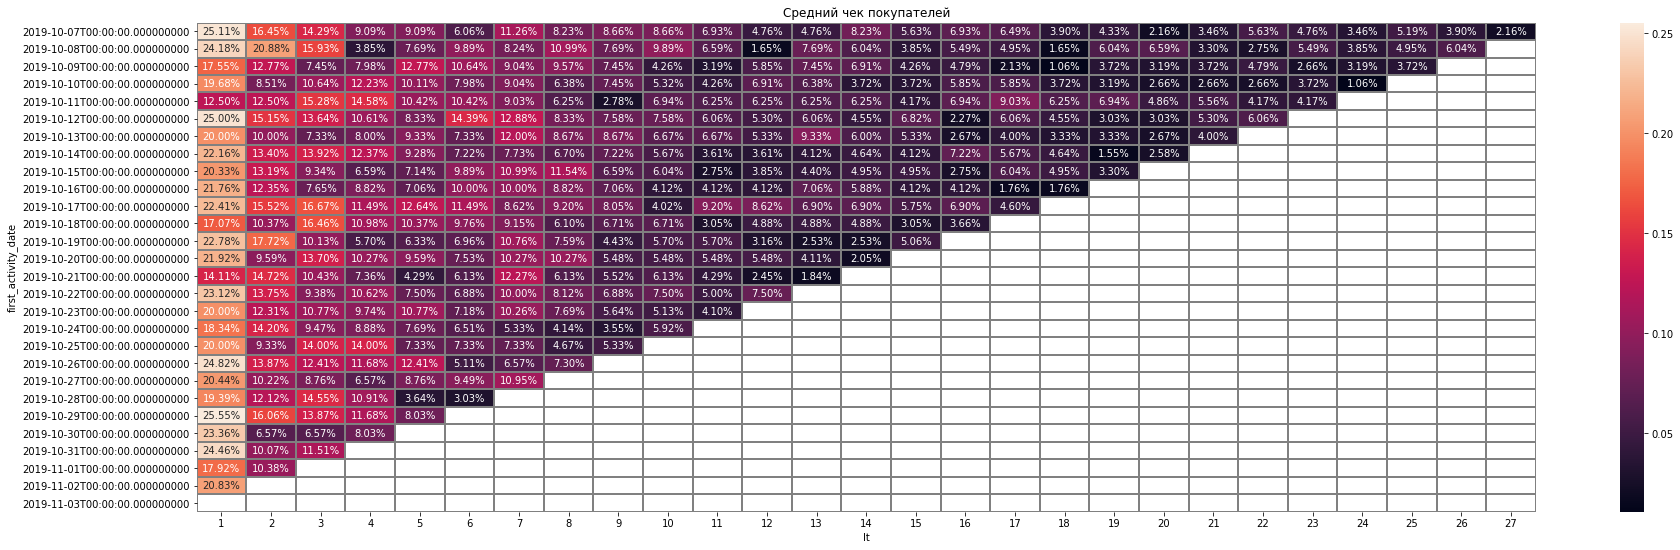

In [71]:
plt.figure(figsize=(30, 9))
plt.title('Средний чек покупателей')
sns.heatmap(pivot_retention.loc[:,1:], annot=True, fmt='.2%', linewidths=1, linecolor='gray')

In [72]:
target_clients = target_sessions_df['client_id'].unique()

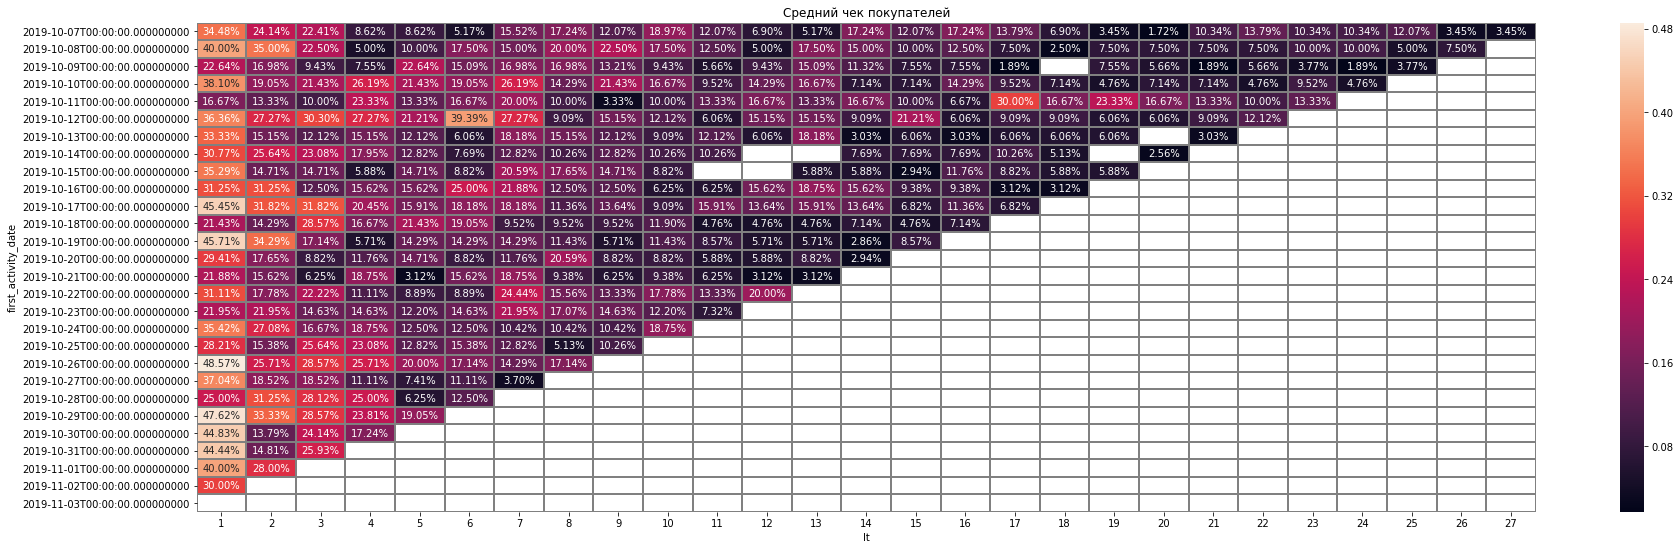

In [73]:
cohort_grouping = df[df['client_id'].isin(target_clients)].groupby(['first_activity_date','lt']).agg(users=('client_id','nunique')).reset_index()

cohort_grouping = cohort_grouping.merge(cohort_grouping.query('lt == 0').drop('lt',axis=1),
                      on='first_activity_date',how='left',suffixes=['','_initial']).\
    assign(retention_rate=lambda x: x['users']/x['users_initial'])

pivot_retention_target = cohort_grouping.pivot_table(index='first_activity_date',columns='lt',values='retention_rate',aggfunc='sum')

plt.figure(figsize=(30, 9))
plt.title('Средний чек покупателей')
sns.heatmap(pivot_retention_target.loc[:,1:], annot=True, fmt='.2%', linewidths=1, linecolor='gray')

In [74]:
pivot_retention.mean()

lt
0    1.000
1    0.209
2    0.128
3    0.118
4    0.097
5    0.087
6    0.082
7    0.096
8    0.078
9    0.065
10   0.062
11   0.051
12   0.050
13   0.056
14   0.053
15   0.047
16   0.050
17   0.051
18   0.036
19   0.039
20   0.035
21   0.040
22   0.043
23   0.042
24   0.029
25   0.046
26   0.050
27   0.022
dtype: float64

In [75]:
ret_data = pivot_retention.mean().to_frame().rename(columns={0:'all'}).join(
    pivot_retention_target.mean().to_frame().rename(columns={0:'target'})).unstack().reset_index().rename(columns={0:'retention'})

In [76]:
ret_data.pivot_table(index='lt',columns='level_0',values='retention',aggfunc='sum')

level_0   all  target
lt                   
0       1.000   1.000
1       0.209   0.340
2       0.128   0.225
3       0.118   0.202
4       0.097   0.165
5       0.087   0.140
6       0.082   0.149
7       0.096   0.169
8       0.078   0.135
9       0.065   0.122
10      0.062   0.121
11      0.051   0.094
12      0.050   0.102
13      0.056   0.117
14      0.053   0.097
15      0.047   0.088
16      0.050   0.096
17      0.051   0.097
18      0.036   0.069
19      0.039   0.081
20      0.035   0.068
21      0.040   0.075
22      0.043   0.090
23      0.042   0.094
24      0.029   0.067
25      0.046   0.069
26      0.050   0.055
27      0.022   0.034

In [77]:
ret_data

level_0  lt  retention
0      all   0      1.000
1      all   1      0.209
2      all   2      0.128
3      all   3      0.118
4      all   4      0.097
5      all   5      0.087
6      all   6      0.082
7      all   7      0.096
8      all   8      0.078
9      all   9      0.065
10     all  10      0.062
11     all  11      0.051
12     all  12      0.050
13     all  13      0.056
14     all  14      0.053
15     all  15      0.047
16     all  16      0.050
17     all  17      0.051
18     all  18      0.036
19     all  19      0.039
20     all  20      0.035
21     all  21      0.040
22     all  22      0.043
23     all  23      0.042
24     all  24      0.029
25     all  25      0.046
26     all  26      0.050
27     all  27      0.022
28  target   0      1.000
29  target   1      0.340
30  target   2      0.225
31  target   3      0.202
32  target   4      0.165
33  target   5      0.140
34  target   6      0.149
35  target   7      0.169
36  target   8      0.135
37  target   9      0.122
38  target  10      0.121
39  target  11      0.094
40  target  12      0.102
41  target  13      0.117
42  target  14      0.097
43  target  15      0.088
44  target  16      0.096
45  target  17      0.097
46  target  18      0.069
47  target  19      0.081
48  target  20      0.068
49  target  21      0.075
50  target  22      0.090
51  target  23      0.094
52  target  24      0.067
53  target  25      0.069
54  target  26      0.055
55  target  27      0.034

In [78]:
fig = px.line(ret_data, x="lt", y="retention", color='level_0')
fig.show()

In [79]:
# Как изменяется процент целевых действий с течением времени
cohort_grouping = df.groupby(['first_activity_date','lt']).agg(users=('client_id','nunique')).reset_index()


In [80]:
cohort_grouping_target = df[target_event_condition].groupby(['first_activity_date','lt']).agg(target_users=('client_id','nunique')).reset_index()

In [81]:
merged_cohorts = cohort_grouping.merge(cohort_grouping_target,on=['first_activity_date','lt'],how='left')

In [82]:
merged_cohorts['target_users'] = merged_cohorts['target_users'].fillna(0).astype(int)

In [83]:
merged_cohorts['percent'] = merged_cohorts['target_users'] / merged_cohorts['users']

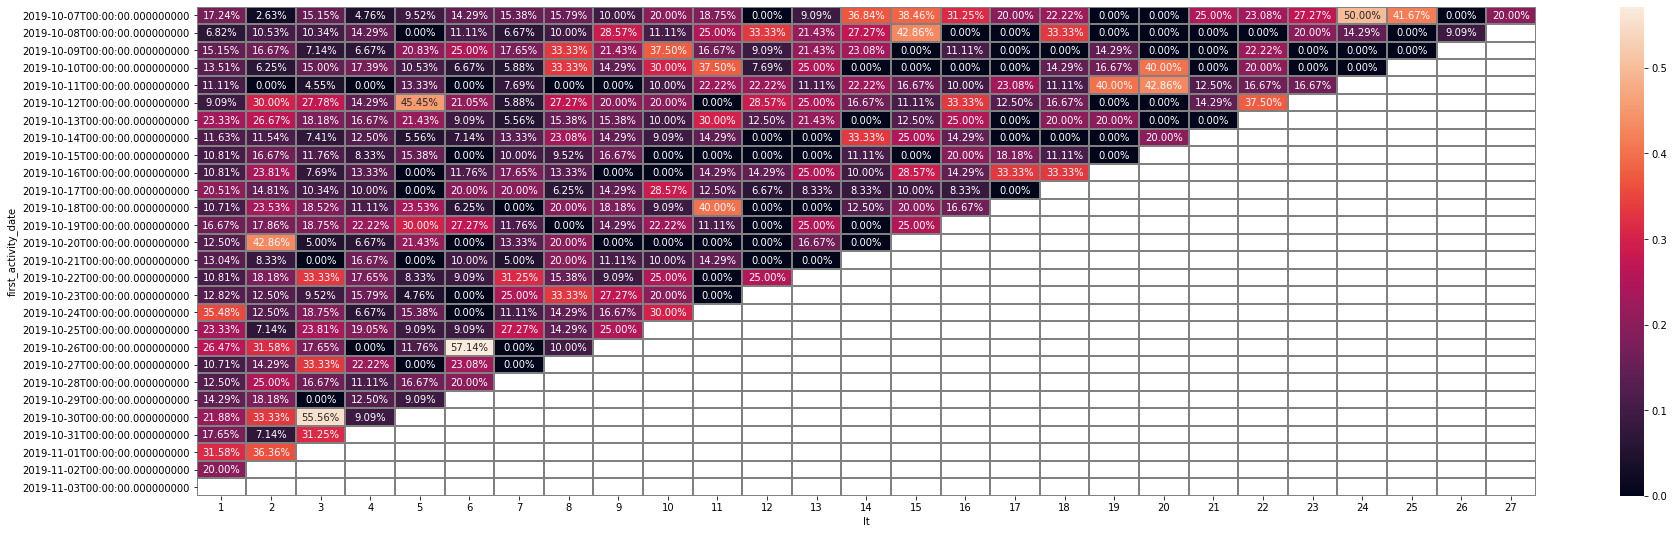

In [84]:
pivot_retention_target = merged_cohorts.pivot_table(index='first_activity_date',columns='lt',values='percent',aggfunc='sum')

plt.figure(figsize=(30, 9))
sns.heatmap(pivot_retention_target.loc[:,1:], annot=True, fmt='.2%', linewidths=1, linecolor='gray')

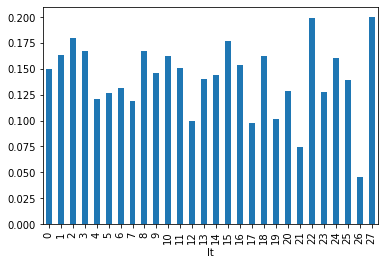

In [85]:
pivot_retention_target.mean().plot(kind='bar')

In [86]:
# Разобрать как можно отображать на когортах более сложные метрики

In [87]:
# Дальше разобрать пример как собирать отчет по последовательностям переходов

In [88]:
df[(df['sessionId'].isin(sessions_with_target_events)) & (df['activityType'] == 'EVENT')].groupby(['sessionId'])['eventName'].apply(list)

sessionId
1570394039    [block, target_event, block, block, block, blo...
1570425067                                       [target_event]
1570429923                                       [target_event]
1570432704           [block, target_event, block, block, block]
1570432783    [target_event, target_event, target_event, tar...
                                    ...                        
1572810817    [search, block, add, target_event, block, bloc...
1572810984    [block, block, block, block, block, search, se...
1572811086    [block, bad_event, block, block, target_event,...
1572811632    [block, block, block, block, block, block, blo...
1572813857           [target_event, block, block, block, block]
Name: eventName, Length: 1869, dtype: object

In [89]:
path_frame = df[(df['sessionId'].isin(sessions_with_target_events)) & (df['activityType'] == 'EVENT')].groupby(['sessionId'])['eventName'].apply(list).to_frame().reset_index()

In [90]:
path_frame

sessionId                                          eventName
0     1570394039  [block, target_event, block, block, block, blo...
1     1570425067                                     [target_event]
2     1570429923                                     [target_event]
3     1570432704         [block, target_event, block, block, block]
4     1570432783  [target_event, target_event, target_event, tar...
...          ...                                                ...
1864  1572810817  [search, block, add, target_event, block, bloc...
1865  1572810984  [block, block, block, block, block, search, se...
1866  1572811086  [block, bad_event, block, block, target_event,...
1867  1572811632  [block, block, block, block, block, block, blo...
1868  1572813857         [target_event, block, block, block, block]

[1869 rows x 2 columns]

In [91]:
path_frame['path'] = path_frame['eventName'].apply(lambda x: ' > '.join(x))

In [92]:
path_frame.groupby(['path']).agg(sessions=('sessionId','nunique')).reset_index().sort_values('sessions',ascending=False)

path  sessions
898                                        target_event       259
992                         target_event > target_event       150
306                                block > target_event        40
1023         target_event > target_event > target_event        35
476                                image > target_event        33
...                                                 ...       ...
375   block > target_event > block > target_event > ...         1
376   block > target_event > block > target_event > ...         1
377   block > target_event > block > target_event > ...         1
378   block > target_event > block > target_event > ...         1
1069  target_event > target_event > target_event > t...         1

[1070 rows x 2 columns]

In [93]:
path_frame = df[(df['sessionId'].isin(sessions_with_target_events)) & (df['activityType'] == 'EVENT')].drop_duplicates(['sessionId','eventName']).groupby(['sessionId'])['eventName'].apply(list).to_frame().reset_index()


In [94]:
path_frame['path'] = path_frame['eventName'].apply(lambda x: ' > '.join(x))


In [95]:
path_frame.groupby(['path']).agg(sessions=('sessionId','nunique')).reset_index().sort_values('sessions',ascending=False)

path  sessions
294                                       target_event       498
77                                block > target_event       254
138                               image > target_event       115
281                              search > target_event        72
320                               target_event > image        53
..                                                 ...       ...
125  hop > other > open > show > block > bad_event ...         1
124          hop > other > open > block > target_event         1
123              hop > open > target_event > bad_event         1
122                          hop > open > target_event         1
337                      target_event > search > other         1

[338 rows x 2 columns]

In [96]:
new_df = df[(df['sessionId'].isin(sessions_with_target_events)) & (df['activityType'] == 'EVENT')].drop_duplicates(['sessionId','eventName'])

In [97]:
new_df['order_of_event'] = new_df.sort_values('activityTime').groupby(['sessionId'])['activityTime'].cumcount() + 1

In [98]:
new_df_s = new_df[new_df['eventName'] == 'target_event'].groupby(['sessionId']).agg(order_of_target = ('order_of_event','min')).reset_index()


In [99]:
new_df = new_df.merge(new_df_s,on='sessionId',how='left')

In [100]:
new_df['delta_order'] = new_df['order_of_event'] - new_df['order_of_target']

In [101]:
new_df.groupby(['eventName','delta_order']).agg(sessions=('sessionId','nunique'))


sessions
eventName               delta_order          
add                     -3                  2
                        -2                  3
                        -1                 16
                         1                 18
                         2                  8
...                                       ...
some_registration_event -2                  1
                        -1                  1
                         1                  2
                         2                  1
target_event             0               1869

[118 rows x 1 columns]

In [102]:
# Дальше разобрать пример как оставить только уникальные эвенты в цепочке

In [103]:
# Дальше разобрать пример нахождения времени между стартом сессии и 